# **WINE PROJECT**

In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Reading our csv datafile

df=pd.read_csv("Wine.csv")
df.head()

Alcohol  Malic acid   Ash  ...   Hue  OD280/OD315 of diluted wines  Proline
0    14.23        1.71  2.43  ...  1.04                          3.92     1065
1    13.20        1.78  2.14  ...  1.05                          3.40     1050
2    13.16        2.36  2.67  ...  1.03                          3.17     1185
3    14.37        1.95  2.50  ...  0.86                          3.45     1480
4    13.24        2.59  2.87  ...  1.04                          2.93      735

[5 rows x 13 columns]

In [ ]:
df.columns

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

#### **The variable names(chemicals here), which when mixed in different proportions leads to different categories of WINES**

In [ ]:
df.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

#### **All the variables are numeric**

## **UNIVARIATE ANALYSIS**

In [ ]:
# A user-defined function for univariate analysis

def univarstats(df):
  univar_df=pd.DataFrame(columns=['Count','Missing','No. of Unique','Dtype','Numeric','Mode','Mean','Min','25%','Median','75%','Max',
                                  'Std','Skewness','Kurtosis','Coeff of Variation'])

  for col in df:
      univar_df.loc[col]=[df[col].count(),df[col].isnull().sum(),df[col].nunique(),df[col].dtype,pd.api.types.is_numeric_dtype(df[col]),
                          df[col].mode().values[0],df[col].mean(),df[col].min(),df[col].quantile(0.25),df[col].median(),df[col].quantile(0.75),
                          df[col].max(),df[col].std(),df[col].skew(),df[col].kurt(),(df[col].std())/(df[col].mean())]
    
  return univar_df.sort_values(by=['Coeff of Variation','Skewness','No. of Unique'],ascending=False)

  pd.set_option('display.max_rows',100)
  pd.set_option('display.max_columns',100)


In [ ]:
univarstats(df)

Count Missing  ...  Kurtosis Coeff of Variation
Flavanoids                     178       0  ... -0.880382           0.492226
Malic acid                     178       0  ...  0.299207           0.478159
Color intensity                178       0  ...  0.381522           0.458332
Proline                        178       0  ... -0.248403           0.421623
Proanthocyanins                178       0  ...  0.554649           0.359771
Nonflavanoid phenols           178       0  ... -0.637191           0.343933
Total phenols                  178       0  ... -0.835627           0.272689
OD280/OD315 of diluted wines   178       0  ... -1.086435           0.271851
Hue                            178       0  ... -0.344096           0.238730
Alcalinity of ash              178       0  ...  0.487942           0.171304
Magnesium                      178       0  ...  2.104991           0.143195
Ash                            178       0  ...  1.143978           0.115927
Alcohol                        178       0  ... -0.852500           0.062445

[13 rows x 16 columns]

### **From the above statistics , we can say that :**
1. There are no missing values in the data.
2. All the variables are of numeric data type.
3. Magnesium, Malic acid, Color intensity and Proline are highly positively-skewed.
4. All the variables are on different scale and thus we need to standardize them so as to get good results. 
5.Coefficient of Variation is maximum for Flavanoids,so variability in the data is explained the most by Flavanoids.



### **Lets move on further to the Uni-variate Graphical Analysis**

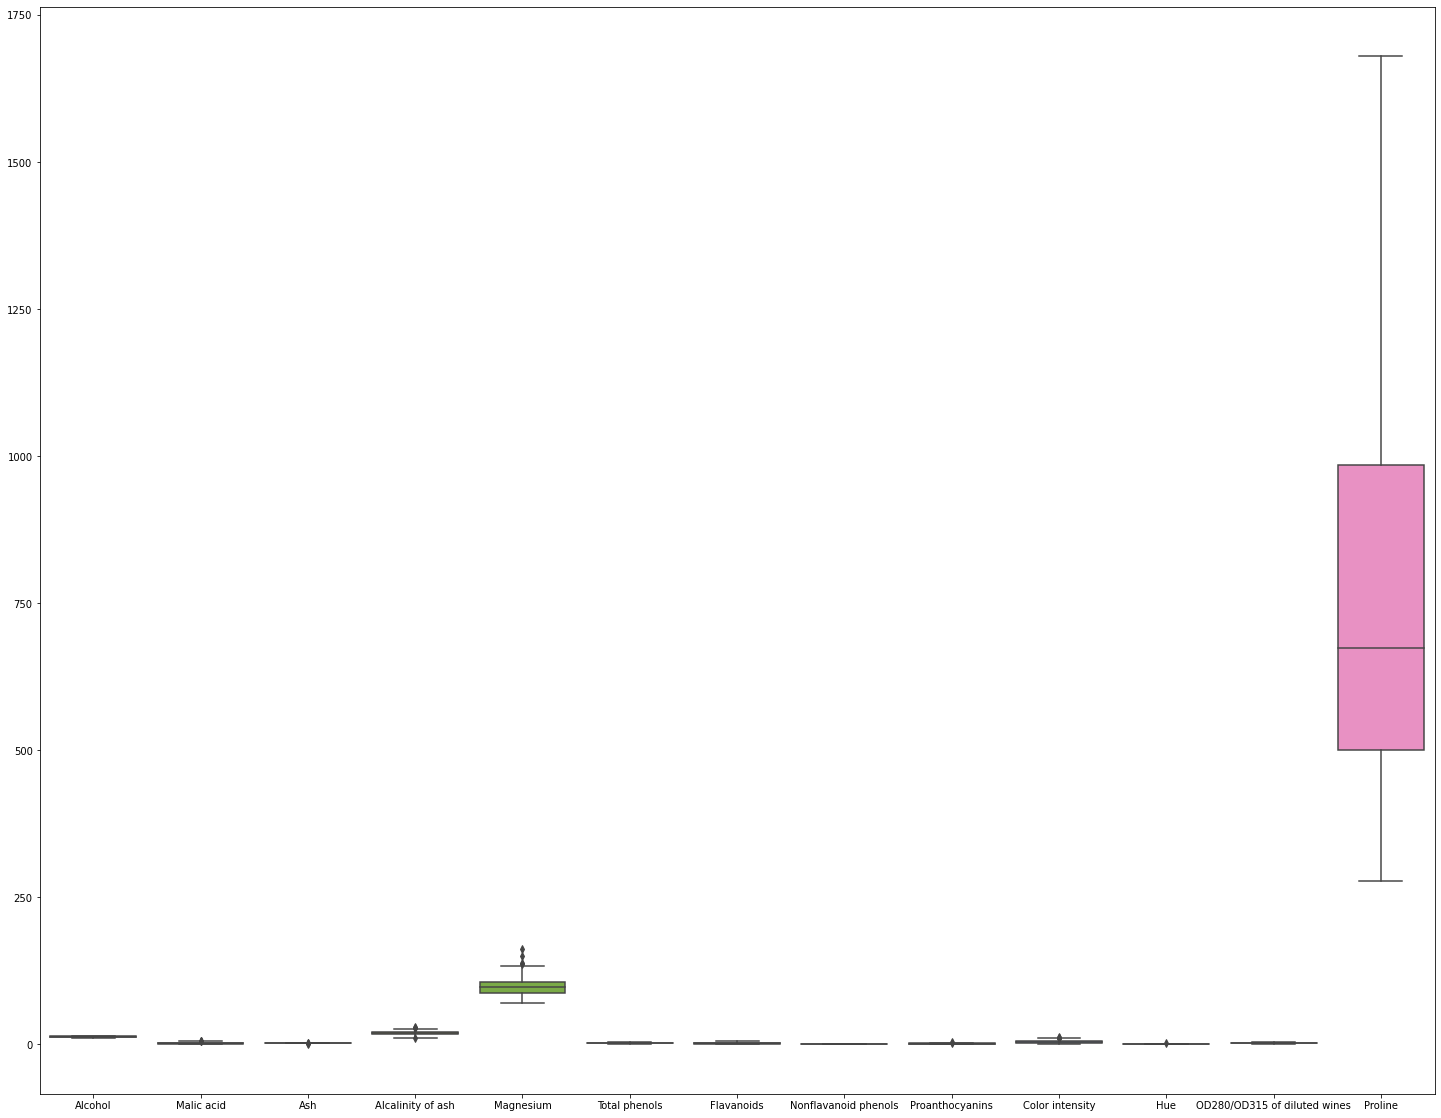

In [ ]:
plt.figure(figsize=(25,20))
sns.boxplot(data=df)

### **Boxplots above shows that Proline has much higher scale than other variables and there are not much outliers in the data so we can just ignore them.**

#### **Let's visualize the histograms of all the variables**

In [ ]:
# distplots 

rows=5
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20));
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j],kde_kws={'linewidth':3,'color':'red'});
        index+=1
        if index>12:
            break
plt.tight_layout();
plt.show();

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

### **Observation:**

**Hue,Proline,Malic acid,Alcohol,Total Phenols,Flavanoids and OD280/OD315 of diluted wines suggests the presence of 2 clusters**

## **BIVARIATE ANALYSIS**

**Let's first observe the Correlation coefficient among all the variables**

In [ ]:
df.corr()

Alcohol  ...   Proline
Alcohol                       1.000000  ...  0.643720
Malic acid                    0.094397  ... -0.192011
Ash                           0.211545  ...  0.223626
Alcalinity of ash            -0.310235  ... -0.440597
Magnesium                     0.270798  ...  0.393351
Total phenols                 0.289101  ...  0.498115
Flavanoids                    0.236815  ...  0.494193
Nonflavanoid phenols         -0.155929  ... -0.311385
Proanthocyanins               0.136698  ...  0.330417
Color intensity               0.546364  ...  0.316100
Hue                          -0.071747  ...  0.236183
OD280/OD315 of diluted wines  0.072343  ...  0.312761
Proline                       0.643720  ...  1.000000

[13 rows x 13 columns]

**OBSERVATIONS:**

**Positive Correlation:**

*High Correlation:* 

1.Flavanoids & Total Phenols

2.Flavanoids & OD280/OD315 of diluted wines 

*Intermediate Correlation:* 

1.Alcohol & Proline

2.Total Phenols & Proanthocyanins

3.Total Phenols & OD280/OD31 diluted wines

4.Flavanoids & Proanthocyanins                      

**Negative Correlation:**

*Intermediate Correlation:* 

1.Malic acid & Hue

2.Flavanoids & nonflavanoid phenols

3.Color intensity & Hue



**Lets Visualize the correlation of each variable with every other variable in the dataset**

In [ ]:
#We use Seaborn library to get the Pair-plot with KDE Plot at the diagonals 
sns.pairplot(df,diag_kind='kde')
plt.suptitle('Pair Plot of Wine data', size = 50);

In [ ]:
#Pair grid with kde plots
grid=sns.PairGrid(df)
grid.map_lower(sns.kdeplot,cmap = 'Reds');
plt.suptitle('Pairgrid(kde plots) in lower map',size=50)

Text(0.5, 0.98, 'Pairgrid(kde plots) in lower map')

In [ ]:
grid=sns.PairGrid(df)
grid.map_upper(sns.kdeplot,cmap = 'ocean');
plt.suptitle('Pairgrid(kde plots) in upper map',size=50);

**Most of the KDE Plots above suggests the presence of two clusters in the dataset while few of them (e.g. Total Phenols,Flavanoids, Diluted wines ) suggests the presence of 3 clusters in the dataset**

#### **From the correlation above , we observed that Total Phenols and Flavanoids have high positive correlation (0.86) which we can lead to multicollinearity in the data and thus give biased results.**

#### **So, we drop one of them from the data before proceeding further** 

In [ ]:
# Dropping Total Phenols 
df1=df.drop(['Total phenols'],axis=1)

#### **As we have many features in the dataset so in order to perform different clustering algorithms, we reduce our dataset from higher dimension to lower dimension using PCA.**

##### **And PCA requires standardization of our variables first**

In [ ]:
# Standardizing the data

from sklearn.preprocessing import StandardScaler
df_scaled=StandardScaler().fit_transform(df1)
df=pd.DataFrame(df_scaled,columns=df1.columns)

## **Dimension Reduction using PCA(Principal Component Analysis)**

In [ ]:
# Importing PCA
from sklearn.decomposition import PCA

In [ ]:
# Reduction to 2-Principal Components

pca_2=PCA(n_components=2).fit(df)
pca_2_df=pca_2.transform(df)

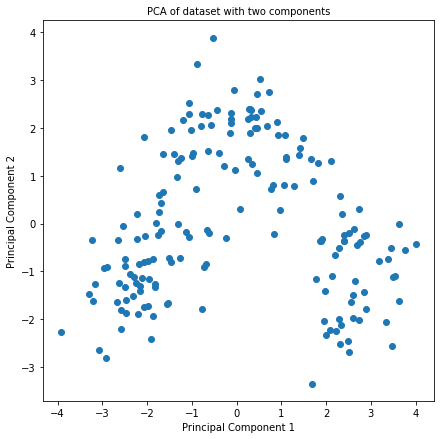

In [ ]:
## Plotting these two Principal Components

plt.figure(figsize=(7,7))
plt.xlabel("Principal Component 1",fontsize=10)
plt.ylabel("Principal Component 2",fontsize=10)
plt.title("PCA of dataset with two components",fontsize=10)
plt.scatter(pca_2_df[:,0],pca_2_df[:,1])
plt.show()

In [ ]:
#Varaince-ratio explained these two components
pca_2.explained_variance_ratio_

array([0.33569477, 0.20699686])

#### **The above two Principal Components obtained on PCA reduction explains around 54.25% of the variance in the data.**  

In [ ]:
## Reducing to 3 Principal Components
pca_3=PCA(n_components=3)
pca_3_df=pca_3.fit_transform(df)

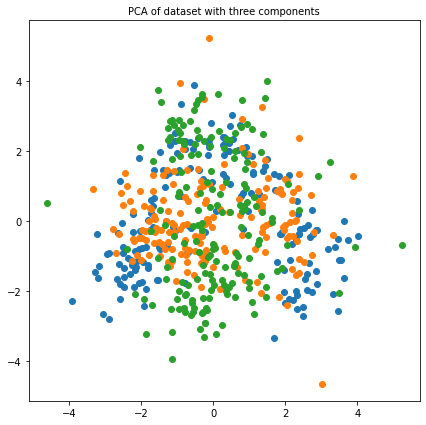

In [ ]:
## Plotting these three Principal Components

plt.figure(figsize=(7,7))
plt.title("PCA of dataset with three components",fontsize=10)
plt.scatter(pca_3_df[:,0],pca_3_df[:,1])
plt.scatter(pca_3_df[:,1],pca_3_df[:,2])
plt.scatter(pca_3_df[:,2],pca_3_df[:,0])

plt.show()

In [ ]:
#Varaince-ratio explained these three components
pca_3.explained_variance_ratio_

array([0.33569477, 0.20699686, 0.1179914 ])

#### **The above 3 Principal Components explains 66.1% of the variance in the data which is around 12% more than that explained by 2 components.So, we choose PCA with 3 components. (We have taken Cumulative Sum of Explained Variance Ratio)**

In [ ]:
pca_3.components_

array([[-0.14235969,  0.28335851,  0.02952143,  0.27524733, -0.15179971,
        -0.44255479,  0.33387822, -0.32894656,  0.11883179, -0.33775108,
        -0.404521  , -0.30396817],
       [-0.49731854, -0.20371202, -0.30815483,  0.0365058 , -0.31394158,
        -0.02005137, -0.0033101 , -0.05721006, -0.52425713,  0.25666303,
         0.14249093, -0.38937536],
       [-0.18725076,  0.05299948,  0.64625017,  0.59514703,  0.18749294,
         0.17225917,  0.13646008,  0.16674571, -0.14525583,  0.12577281,
         0.18782575, -0.08270462]])

#### **Now, lets try to visualize which all different variables contributes to different cluters using Bi-Plot**

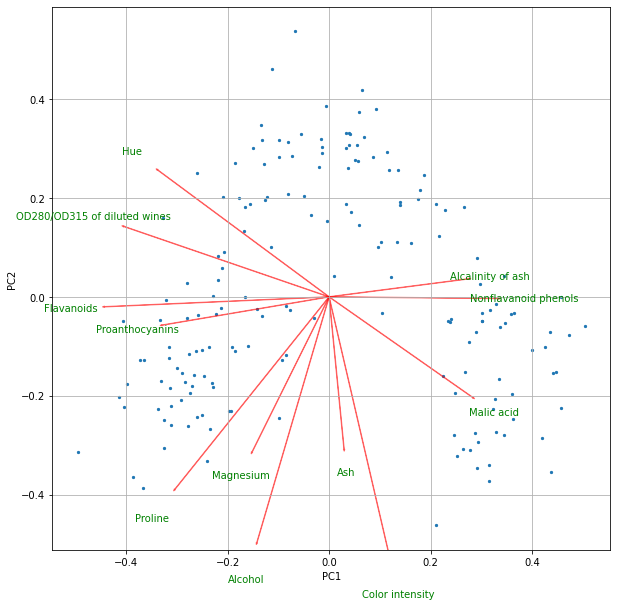

In [ ]:
#Bi-plot

plt.figure(figsize=(10,10))

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

myplot(pca_3_df[:,0:2],np.transpose(pca_3.components_[0:2, :]),list(df.columns))
plt.show()

#### **From the bi-plot above,the variables which seems closer to one another can be assumed to form a cluster.**

#### **OBSERVATIONS:**
1.Alkalinity of Ash,Nonflavanoid phenols,Malic acid tend to form one of the clusters.

2.Color Intensity,Ash,Alcohol,Magnesium and Proline tend to form another cluster.

3.Hue,Diluted wines,Flavanoids and Proanthocyanins tend to form yet another cluster.

In [ ]:
# New dataframe with 3 variables(Principal Components)
dataset=pca_3_df
new_df=pd.DataFrame(dataset)
new_df.columns=['PC1','PC2','PC3']
new_df.head()

PC1       PC2       PC3
0 -3.210072 -1.614534  0.063360
1 -2.224695  0.197755 -1.940167
2 -2.302231 -1.116764  1.069021
3 -2.908373 -2.799793 -0.232880
4 -0.673968 -0.844405  2.047052

## **CLUSTERING**

#### **We will fit the following clustering models:**
1. K-Means Clustering
2. K-Medoids Clustering
3. Gaussian Mixture Model Clustering
4. Hierarchical Clustering
5. Spectral Clustering

#### **But before proceeding further we need to decide the no. of clusters in which our data is to be clustered.**
    
For this, we use two methods : 
1. Elbow Method - We plot the Sum of Squared Errors(SSE) against no. of clusters.Number corresponding to which we get an elbow                     in the graph is considered to be the suitable value for no. of clusters.
2. Silhouette Score Method - More is the value of the Silhouette score,better is the model.

### **1. K-Means Clustering**

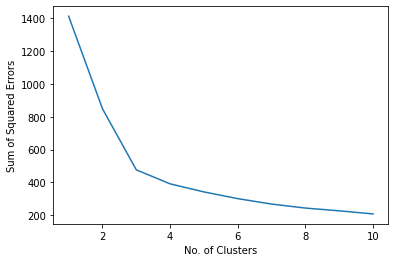

In [ ]:
from sklearn.cluster import KMeans
SSE=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(new_df)
    SSE.append(Kmeans.inertia_)
plt.plot(range(1,11),SSE)
plt.xlabel("No. of Clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

#### **From the above plot, using Elbow Method we can say that we may have 2 or 3 clusters.**

In [ ]:
kmeans_2=KMeans(n_clusters=2,init='k-means++',random_state=42).fit(new_df)
kmeans_3=KMeans(n_clusters=3,init='k-means++',random_state=42).fit(new_df)

y_kmeans_2=kmeans_2.fit_predict(new_df)
y_kmeans_3=kmeans_3.fit_predict(new_df)

#### **We have fitted the model using both 2 and 3 clusters,now lets decide which one to choose using Silhoutte Score**

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
## clusters 2 or 3 ? .Let's decide it using Silhouette index
print(f'Silhouette Score(n=2): {silhouette_score(new_df, y_kmeans_2)}')
print(f'Silhouette Score(n=3): {silhouette_score(new_df, y_kmeans_3)}')

Silhouette Score(n=2): 0.38579164917265385
Silhouette Score(n=3): 0.46592164165290484


#### **Since Silhouette score for 3 clusters is more than that of 2 clusters.Thus,we choose no. of clusters to be 3**

In [ ]:
# Labels
y_kmeans_3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

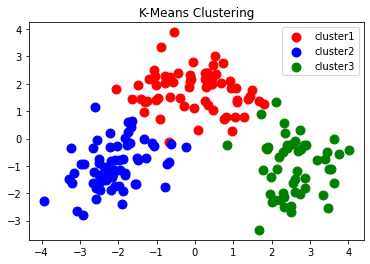

In [ ]:
#Visualizing these clusters using scatter plot(We have taken PC1 and PC2 on x-axis and y-axis)

plt.scatter(dataset[y_kmeans_3==0,0],dataset[y_kmeans_3==0,1],s=80,c='red',label='cluster1')
plt.scatter(dataset[y_kmeans_3==1,0],dataset[y_kmeans_3==1,1],s=80,c='blue',label='cluster2')
plt.scatter(dataset[y_kmeans_3==2,0],dataset[y_kmeans_3==2,1],s=80,c='green',label='cluster3')
plt.title("K-Means Clustering")
plt.legend()
plt.show()

#### **So, the above plot represents the 3 clusters in the wine data using K-Means Clustering**

### **2. K-Medoids Clustering**

In [ ]:
! pip install scikit-learn-extra

In [ ]:
from sklearn_extra.cluster import KMedoids

models = [
     (
         KMedoids(metric="manhattan", n_clusters=3, 
         init="heuristic", max_iter=6)
     ),
     (
         KMedoids(metric="euclidean", n_clusters=3,  
         init="heuristic", max_iter=6)
     ),
     (  
         KMedoids(metric="cosine", n_clusters=3, 
         init="heuristic", max_iter=6)
     )
        ] 
kmed_1=models[0].fit(new_df)
kmed_2=models[1].fit(new_df)
kmed_3=models[2].fit(new_df)
#Predicting
y_kmed_1=kmed_1.predict(new_df)
y_kmed_2=kmed_2.predict(new_df)
y_kmed_3=kmed_3.predict(new_df)

In [ ]:
print(f'Silhouette Score("manhattan metric"): {silhouette_score(new_df, y_kmed_1)}')
print(f'Silhouette Score("euclidean metric"): {silhouette_score(new_df, y_kmed_2)}')
print(f'Silhouette Score("cosine"): {silhouette_score(new_df, y_kmed_3)}')

Silhouette Score("manhattan metric"): 0.4606409580937508
Silhouette Score("euclidean metric"): 0.46385236790601553
Silhouette Score("cosine"): 0.4580495157818644


#### **Euclidean metric gives the maximum Silhouette score,which is almost same as that of KMeans Clustering.**

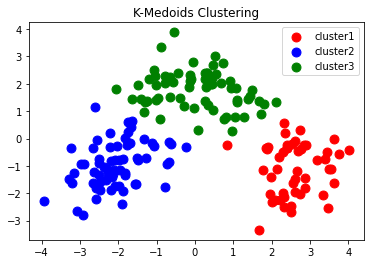

In [ ]:
#Visualizing these clusters using scatter plot with Euclidean metric(We have taken PC1 and PC2 on x-axis and y-axis)

plt.scatter(dataset[y_kmed_2==0,0],dataset[y_kmed_2==0,1],s=80,c='red',label='cluster1')
plt.scatter(dataset[y_kmed_2==1,0],dataset[y_kmed_2==1,1],s=80,c='blue',label='cluster2')
plt.scatter(dataset[y_kmed_2==2,0],dataset[y_kmed_2==2,1],s=80,c='green',label='cluster3')
plt.title("K-Medoids Clustering")
plt.legend()
plt.show()

#### **The above plot represents the 3 cluters in the wine data using K-Medoids Clustering**
#### **Here, the major difference is the assignment of cluster 2 and cluster 3 to data points.It has been reversed when compared to K-Means Clustering**

### **3. Gaussian Mixture clustering**

###### **Gaussian Mixture Models (GMMs) assume that there are a certain number of Gaussian distributions, and each of these distributions represent a cluster.Hence, a Gaussian Mixture Model tends to group the data points belonging to a single distribution together.**


In [ ]:
# To decide the no of clusters, lets again use Silhouette score method

from sklearn.mixture import GaussianMixture

# Model fitting with 2 components
gmm_2 = GaussianMixture(n_components=2)
gmm_2.fit(new_df)
y_gmm_2=gmm_2.predict(new_df)

#Model fitting with 3 components
gmm_3 = GaussianMixture(n_components=3)
gmm_3.fit(new_df)
y_gmm_3=gmm_3.predict(new_df)



In [ ]:
print(f'Silhouette Score("n_clusters=2"): {silhouette_score(new_df, y_gmm_2)}')
print(f'Silhouette Score("n_clusters=3"): {silhouette_score(new_df, y_gmm_3)}')

Silhouette Score("n_clusters=2"): 0.36368934641542017
Silhouette Score("n_clusters=3"): 0.46227165386551144


#### **If we take no of clusters to be 3, we get more value of Silhouette score.So, we will go with 3 cluters.**
##### **NOTE: This value is slightly less than that of KMeans**

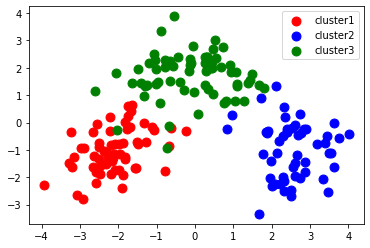

In [ ]:
# Visualizing GMM with 3 clusters

plt.scatter(dataset[y_gmm_3==0,0],dataset[y_gmm_3==0,1],s=80,c='red',label='cluster1')
plt.scatter(dataset[y_gmm_3==1,0],dataset[y_gmm_3==1,1],s=80,c='blue',label='cluster2')
plt.scatter(dataset[y_gmm_3==2,0],dataset[y_gmm_3==2,1],s=80,c='green',label='cluster3')
plt.legend()
plt.show()

### **4. Hierarchical Clustering - Agglomerative Clustering**

##### **To decide the no. of clusters in Hierarchical Clustering, we use Dendrogram**

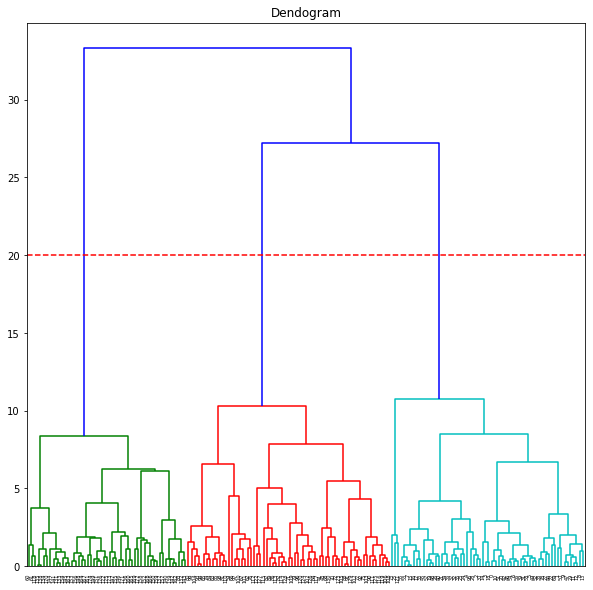

In [ ]:
#Hierarchical Clustering uses Dendrogram to decide the no. of clusters

import scipy.cluster.hierarchy  as shc
plt.figure(figsize=(10,10))
plt.title('Dendogram')
dend=shc.dendrogram(shc.linkage(new_df,method='ward'))

# We have the longest vertical line in the range around 15-25,so we set the threshold to be 20
plt.axhline(y=20,color='red',linestyle='--') 



**From the Dendrogram above, we have the horizontal red dashed line cutting 3 vertical lines**
**So, we set the no. of clusters to be 3** 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster= AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hr=cluster.fit_predict(new_df)
plt.scatter(dataset[:,0],dataset[:,1],s=100,c=cluster.labels_)


### **5. Spectral Clustering**

###### **This clustering technique uses the result from Linear Algebra that any Symmetric matrix is orthogonally similar to Diagonal matrix . Thus we can write : M= D^(-1/2) * K * D^(-1/2)  where K is a Adjacency Matrix(symmetric) and D is a Diagonal matrix.**

###### **K- matrix is formed by using decay rate(rbf parameter) and euclidean distance, k(xi,xj)=exp(-rbf*sq(|xi-xj|))**

In [ ]:
from scipy.spatial import distance
rbf_param =1
# K is a Adjacency Matrix(Square Matrix)
K= np.exp(-rbf_param * distance.cdist(new_df,new_df,metric='sqeuclidean'))
K.shape

(178, 178)

In [ ]:
#D is a diagonal matrix whose diagonal elements are the sum of respective rows of matrix K
D= K.sum(axis=1)
D= np.sqrt(1/D)
M= np.multiply(D[np.newaxis,:],np.multiply(K,D[:,np.newaxis]))
M.shape

(178, 178)

##### **Now, we will use eigen values and eigen vectors of this M matrix to fit the Spectral Clustering Model using K-Means**

In [ ]:
from scipy import linalg
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans

In [ ]:
U,sigma,_ = linalg.svd(M,full_matrices=False,lapack_driver='gesvd')
# first-three eigen vectors are used to form clusters
U_subset=U[:,0:3]
#This requires U_subset to be normalized
y_sc_1=KMeans(n_clusters=3).fit_predict(normalize(U_subset))
y_sc_1


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [ ]:
plt.scatter(dataset[:,0],dataset[:,1],c=y_sc_1,s=100)
plt.show()

##### **While forming the matrix M, we have considered the new_df- which has been obtained after performing PCA on Standardized data.So, lets try to fit another Spectral Clustering model without normalizing the U_subset** 

In [ ]:
#If we don't normalize the U_subset
U,sigma,_ = linalg.svd(M,full_matrices=False,lapack_driver='gesvd')
# first-three eigen vectors are used to form clusters
U_subset=U[:,0:3]
y_sc_2=KMeans(n_clusters=3).fit_predict((U_subset))
y_sc_2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

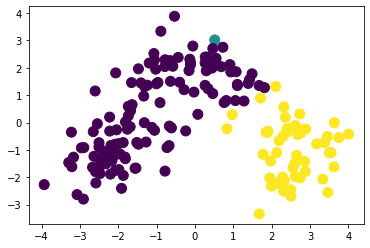

In [ ]:
plt.scatter(dataset[:,0],dataset[:,1],c=y_sc_2,s=100)
plt.show()

##### **The above scatter plot infers that the model has only 2 clusters**

#### **Let's check the performance of the above models using Silhouette Score**


In [ ]:
print(f'Silhouette Score("Normalized"): {silhouette_score(new_df, y_sc_1)}')
print(f'Silhouette Score("Non-Normalized"): {silhouette_score(new_df, y_sc_2)}')

Silhouette Score("Normalized"): 0.4630423012105229
Silhouette Score("Non-Normalized"): 0.3831910643904305


##### **Silhouette score suggests that model with normalized eigen-vectors performs better.**


##### **Now the question arises :**
## **WHICH MODEL TO CHOOSE ?** 

#### **We performed 5 different clustering models on the same dataset.To choose the best-fit model,we compare all of them**

In [ ]:
print(f'Silhouette Score("K-Means"): {silhouette_score(new_df, y_kmeans_3)}')
print(f'Silhouette Score("K-Medoids"): {silhouette_score(new_df, y_kmed_2)}')
print(f'Silhouette Score("GMM"): {silhouette_score(new_df, y_gmm_3)}')
print(f'Silhouette Score("Hierarchical"): {silhouette_score(new_df, y_hr)}')
print(f'Silhouette Score("Spectral"): {silhouette_score(new_df, y_sc_1)}')

Silhouette Score("K-Means"): 0.46592164165290484
Silhouette Score("K-Medoids"): 0.46385236790601553
Silhouette Score("GMM"): 0.46227165386551144
Silhouette Score("Hierarchical"): 0.4529463517837438
Silhouette Score("Spectral"): 0.4630423012105229


Text(0.5, 1.0, 'Spectral Clustering')

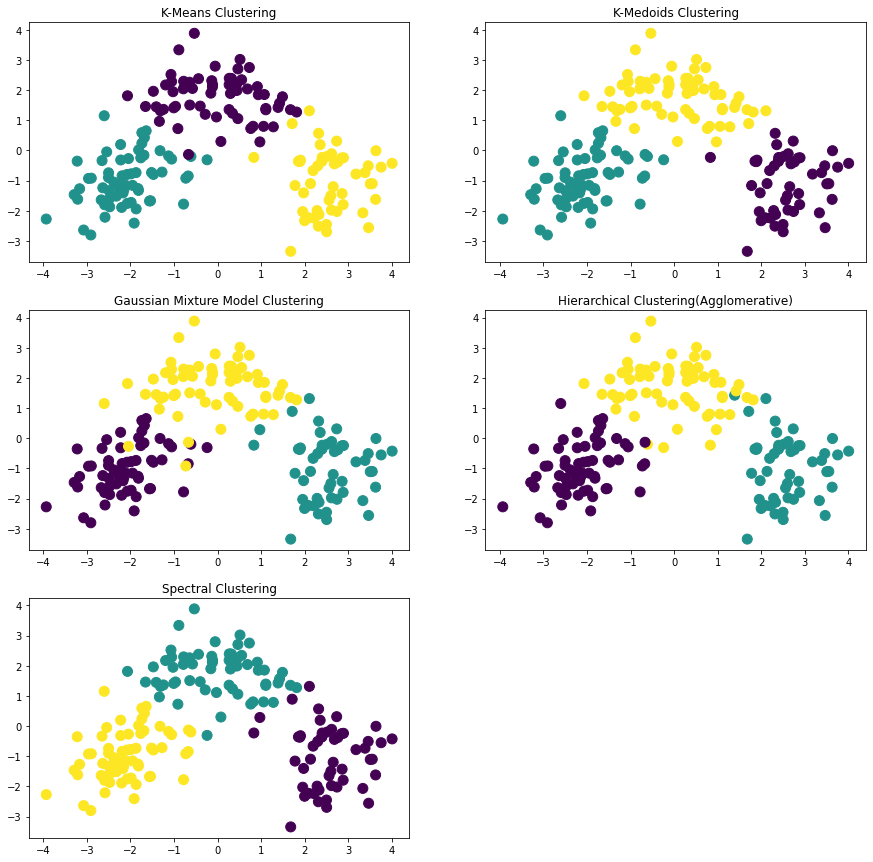

In [ ]:
## Visualizing all the scatter plots at one go

fig=plt.figure(figsize=(15,15))
ax1=fig.add_subplot(3,2,1)
ax2=fig.add_subplot(3,2,2)
ax3=fig.add_subplot(3,2,3)
ax4=fig.add_subplot(3,2,4)
ax5=fig.add_subplot(3,2,5)
ax1.scatter(dataset[:,0],dataset[:,1],c=y_kmeans_3,s=100)
ax1.set_title('K-Means Clustering')
ax2.scatter(dataset[:,0],dataset[:,1],c=y_kmed_2,s=100)
ax2.set_title('K-Medoids Clustering')
ax3.scatter(dataset[:,0],dataset[:,1],c=y_gmm_3,s=100)
ax3.set_title('Gaussian Mixture Model Clustering')
ax4.scatter(dataset[:,0],dataset[:,1],c=y_hr,s=100)
ax4.set_title('Hierarchical Clustering(Agglomerative)')
ax5.scatter(dataset[:,0],dataset[:,1],c=y_sc_1,s=100)
ax5.set_title('Spectral Clustering')


#### **All the scatter plots above are more or less same.So, we use Silhouette Score to finally decide the model of best fit.**


##### **There isn't much difference in the Silhouette scores too, but to choose the best one - K-MEANS Clustering is the best fitted model among all other models.**

In [ ]:
#here the dataframe(df) used is the one before standardization
df=pd.read_csv('Wine.csv')
df['Cluster']=y_kmeans_3
df

Alcohol  Malic acid   Ash  ...  OD280/OD315 of diluted wines  Proline  Cluster
0      14.23        1.71  2.43  ...                          3.92     1065        1
1      13.20        1.78  2.14  ...                          3.40     1050        1
2      13.16        2.36  2.67  ...                          3.17     1185        1
3      14.37        1.95  2.50  ...                          3.45     1480        1
4      13.24        2.59  2.87  ...                          2.93      735        1
..       ...         ...   ...  ...                           ...      ...      ...
173    13.71        5.65  2.45  ...                          1.74      740        2
174    13.40        3.91  2.48  ...                          1.56      750        2
175    13.27        4.28  2.26  ...                          1.56      835        2
176    13.17        2.59  2.37  ...                          1.62      840        2
177    14.13        4.10  2.74  ...                          1.60      560        2

[178 rows x 14 columns]

#### **Now lets visualize the three clusters obtained corresponding to each variable in the dataset**

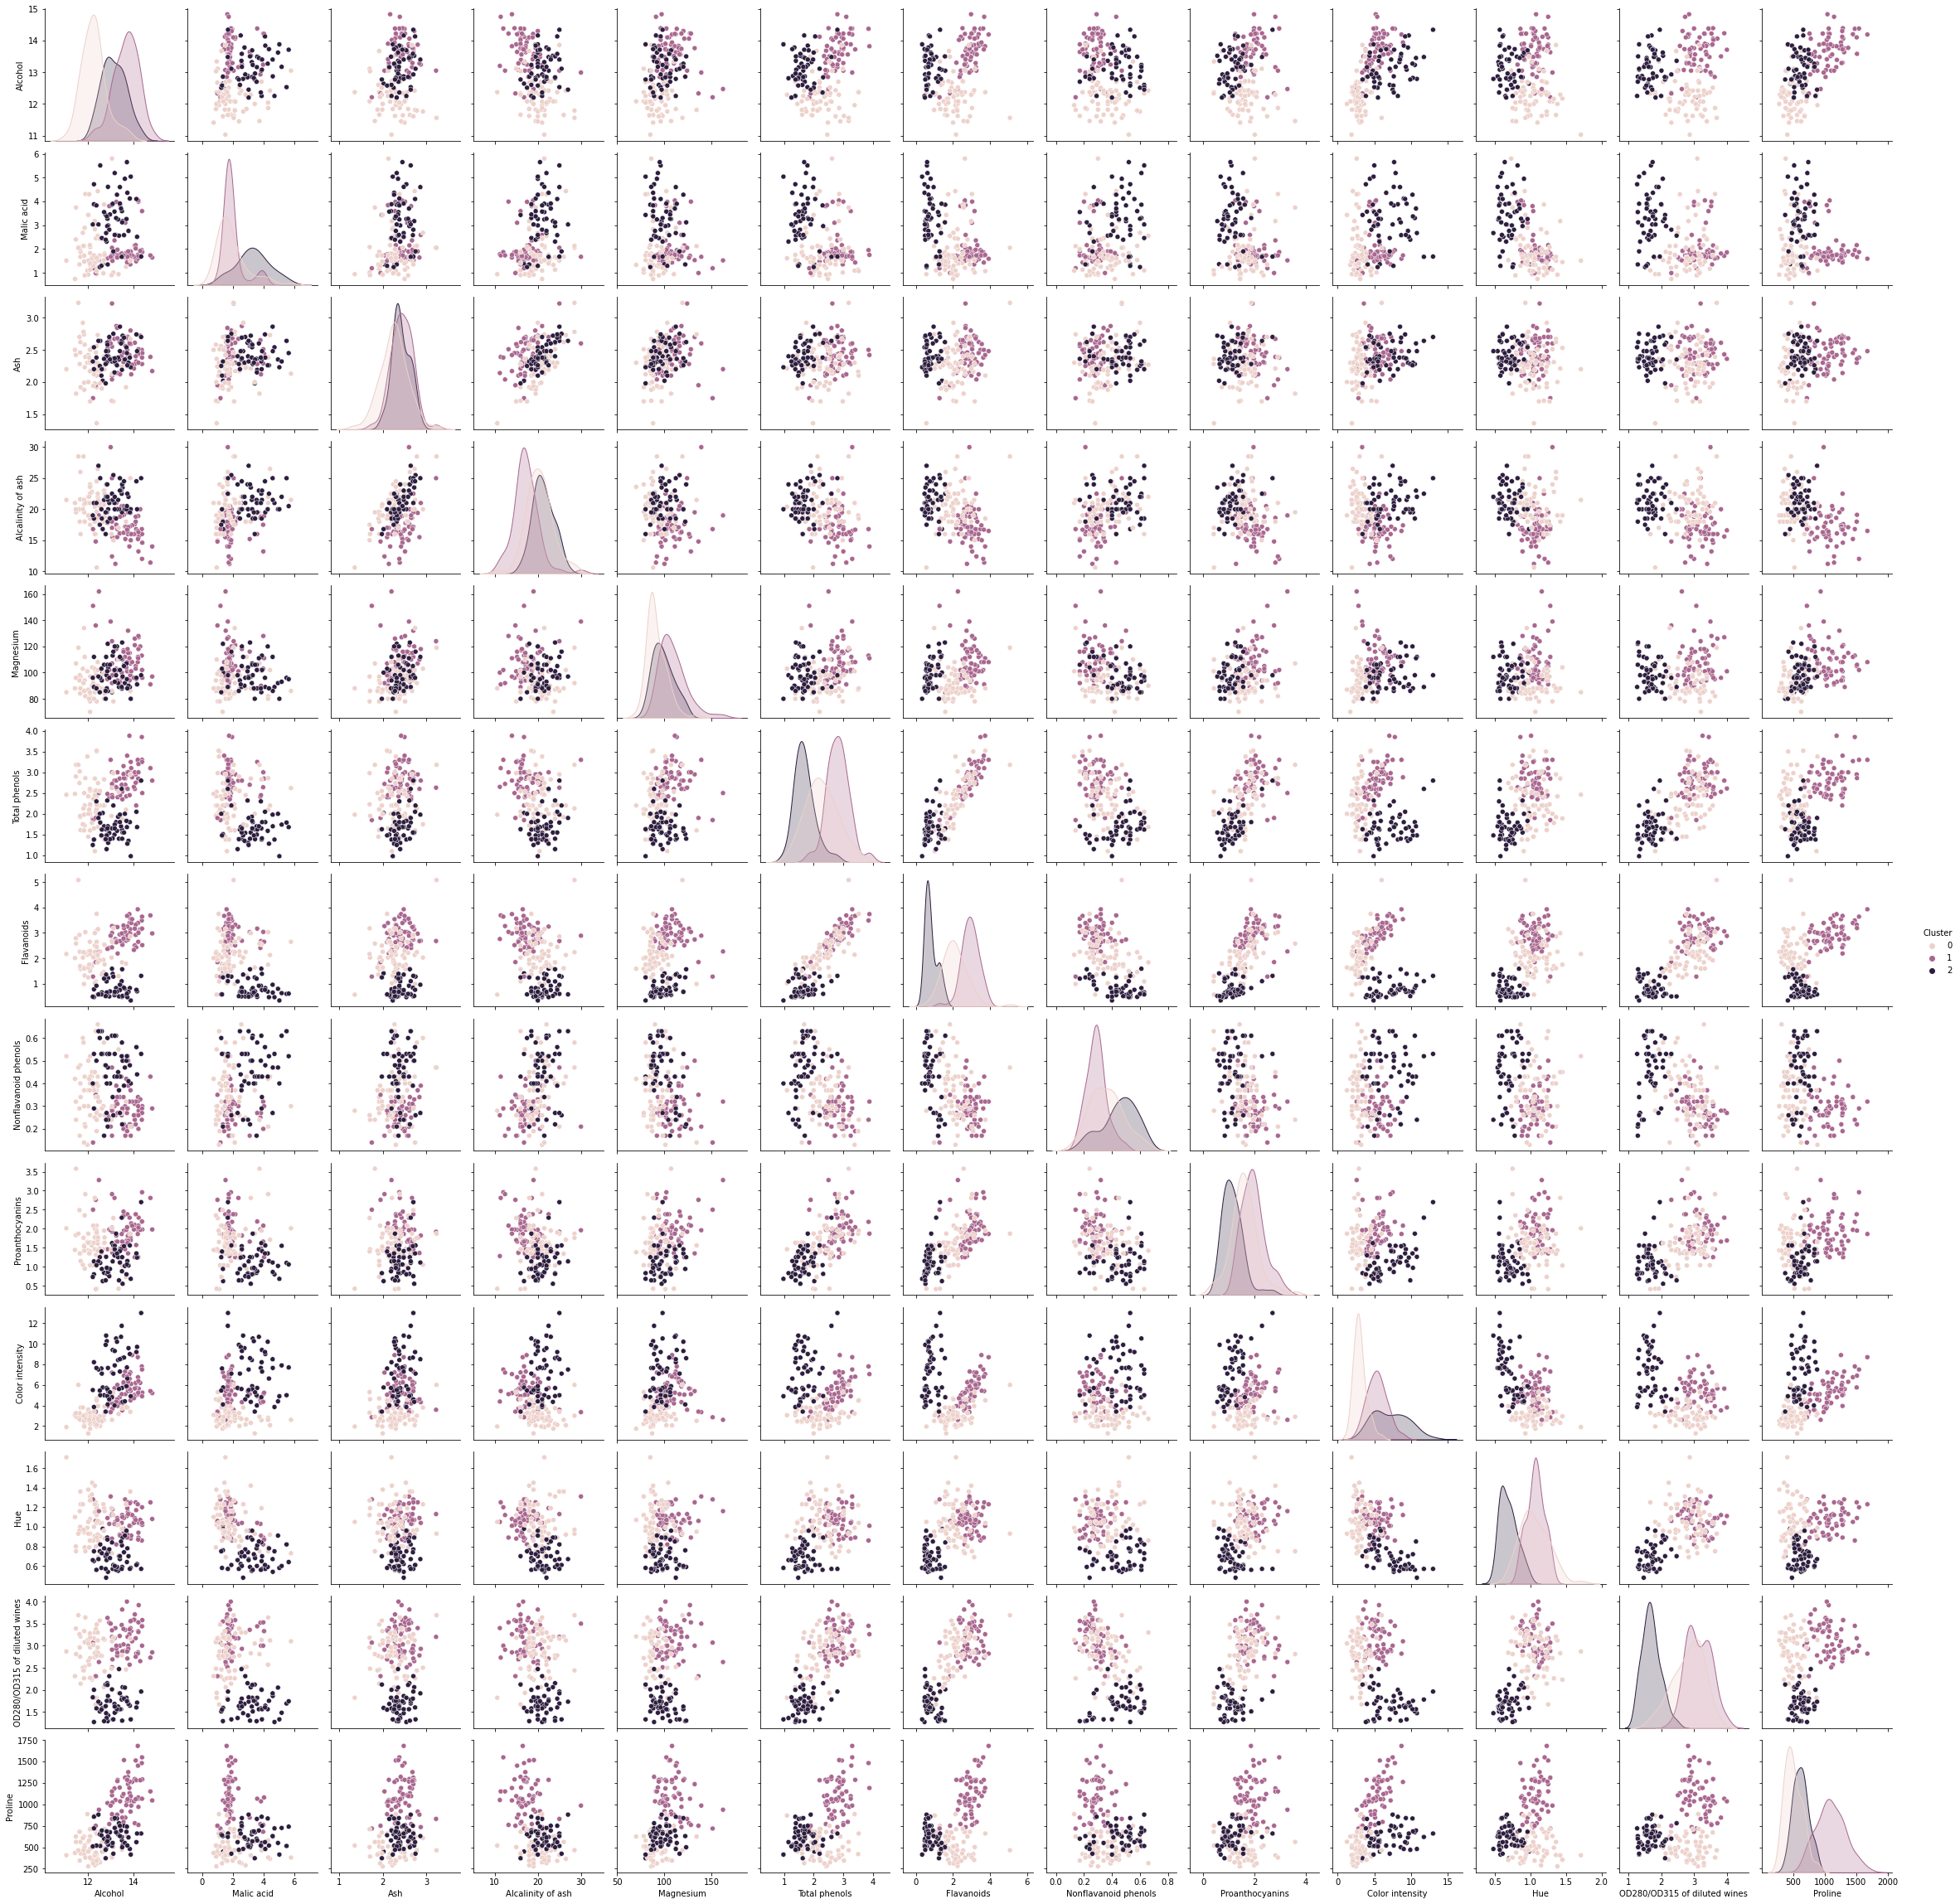

In [ ]:
sns.pairplot(df,hue='Cluster')

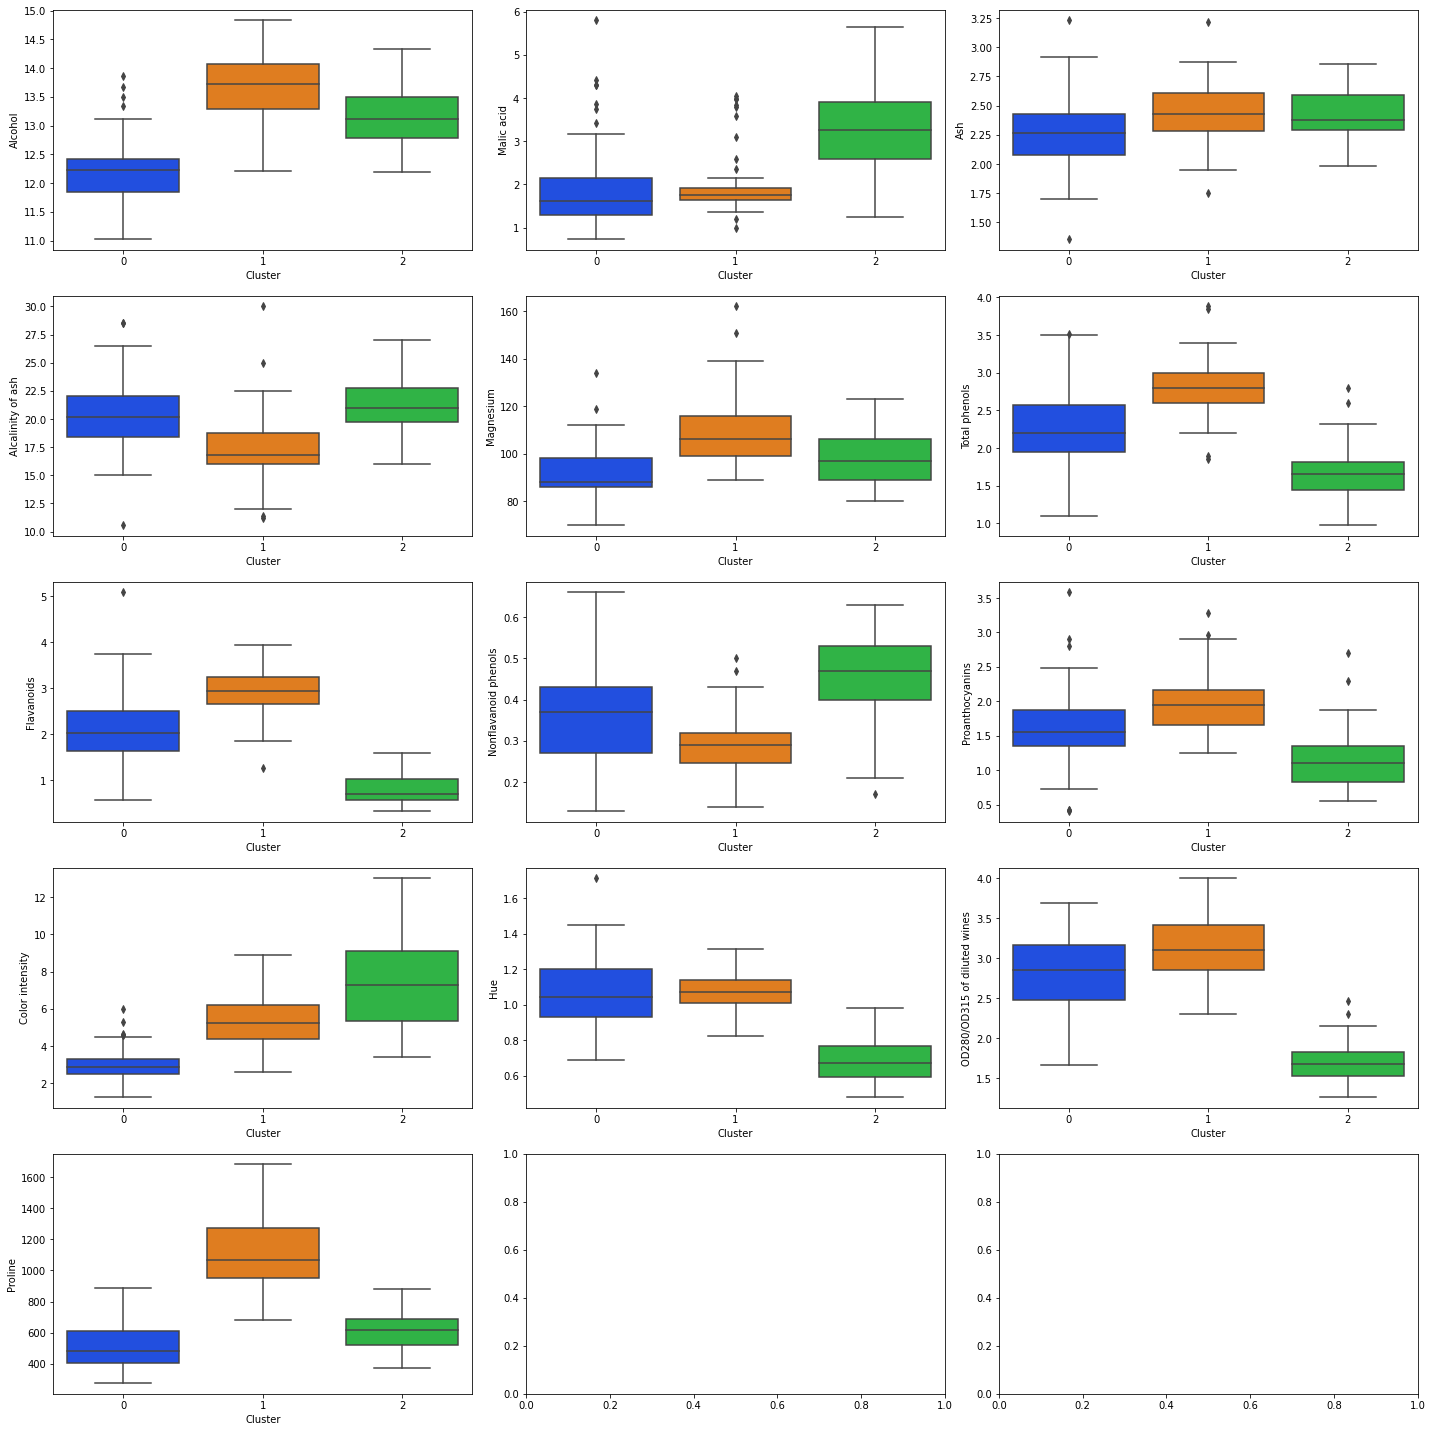

In [ ]:
#Boxplots with 3 clusters corresponding to each variable

rows=5
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,20))
col=df.columns
index=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(x='Cluster',y=df[col[index]],data=df,ax=ax[i][j],palette='bright')
        index+=1
        if index>12:
            break
plt.tight_layout()
plt.show()

In [ ]:
univarstats(df)[['Max','Min']]

Max     Min
Cluster                          2.00    0.00
Flavanoids                       5.08    0.34
Malic acid                       5.80    0.74
Color intensity                 13.00    1.28
Proline                       1680.00  278.00
Proanthocyanins                  3.58    0.41
Nonflavanoid phenols             0.66    0.13
Total phenols                    3.88    0.98
OD280/OD315 of diluted wines     4.00    1.27
Hue                              1.71    0.48
Alcalinity of ash               30.00   10.60
Magnesium                      162.00   70.00
Ash                              3.23    1.36
Alcohol                         14.83   11.03

### **OBSERVATIONS :**

##### We have divided the all the variables in 5 categories according to the different scales of variables: Very High, High, Moderate, Low, Very Low  

In [ ]:
#Based on the boxplots above

table = {'Cluster1':['Low','Low','Moderate','Moderate','Low','Moderate','Moderate','Moderate','Moderate','Low','Moderate','Moderate','Low'],
         'Cluster2':['High','Low','Moderate','Low','Moderate','Moderate','Moderate','Low','Moderate','Moderate','Moderate','High','High'],
         'Cluster3':['Moderate','Moderate','Moderate','Moderate','Moderate','Low','Very low','High','Low','High','Low','Very Low','Low']}
table=pd.DataFrame(table,index=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'])
table

Cluster1  Cluster2  Cluster3
Alcohol                            Low      High  Moderate
Malic acid                         Low       Low  Moderate
Ash                           Moderate  Moderate  Moderate
Alcalinity of ash             Moderate       Low  Moderate
Magnesium                          Low  Moderate  Moderate
Total phenols                 Moderate  Moderate       Low
Flavanoids                    Moderate  Moderate  Very low
Nonflavanoid phenols          Moderate       Low      High
Proanthocyanins               Moderate  Moderate       Low
Color intensity                    Low  Moderate      High
Hue                           Moderate  Moderate       Low
OD280/OD315 of diluted wines  Moderate      High  Very Low
Proline                            Low      High       Low

### **So, when different raw materials(variables) are mixed in different proportions they lead to 3 different categories of wine.**